# Image as data

**Goals**

- Check tensor attributes: size, data types and device
- Manipulate tensors through slicing 
- Perform mathematical operations with tensors, including matrix manipulation and aggregation calculations.
- Downlaod and decompress the dataset.
- Load and explore images using PIL.
- Demonstrate how visual information is stored in tensors, focusing on color channels.

In [3]:
import os
import sys

import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd 
import PIL 
import torch
import torchvision
from PIL import Image
from torchvision import transforms

In [19]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("PIL version:", PIL.__version__)
print("torch version:", torch.__version__)
print("torchvision version:", torchvision.__version__)

Platform: win32
Python version: 3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]
---
matplotlib version: 3.9.2
pandas version: 2.2.3
PIL version: 11.0.0
torch version: 2.5.1+cpu
torchvision version: 0.20.1+cpu


**Working with Tensors in PyTorch**

In [22]:
# Creating a nested tensor
my_values = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
my_tensor = torch.Tensor(my_values)

print("my_tensor class:", type(my_tensor))
print(my_tensor)

my_tensor class: <class 'torch.Tensor'>
tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


**Tensor Attributes**

In [24]:
# Printing the dimensions and data type of my_tensor

print("my_tensor shape: ", my_tensor.shape)
print("my_tensor data type:", my_tensor.dtype)

my_tensor shape:  torch.Size([4, 3])
my_tensor data type: torch.float32


In [25]:
# Tensor device attribute

print("my_tensor device", my_tensor.device)

my_tensor device cpu


In [30]:
# Tensor device change

# Check if GPUs avaialbale via 'cuda'
cuda_gpus_available = torch.cuda.is_available()

# Check if GPUs available via 'mps'
mps_gpus_available = torch.backends.mps.is_available()

print("cuda GPUs available:", cuda_gpus_available)
print("mps GPUs available:", mps_gpus_available)

cuda GPUs available: False
mps GPUs available: False


In [34]:
# Assuming gpu was available:

# my_tensor = my_tensor.to("cuda")

# print("my_tensor device:", my_tensor.device)

**Tensor Slicing**

In [35]:
# Slicing my_tensor into two rows: left_tensor for the top two rows and right_tensor for the bottom two rows
left_tensor = my_tensor[:2,:]
right_tensor = my_tensor[2:,: ]

print("left_tensor class:", type(left_tensor))
print("left_tensor shape:", left_tensor.shape)
print("left_tensor data type:", left_tensor.dtype)
print("left_tensor device:", left_tensor.device)
print(left_tensor)
print()
print("right_tensor class:", type(right_tensor))
print("right_tensor shape:", right_tensor.shape)
print("right_tensor data type:", right_tensor.dtype)
print("right_tensor device:", right_tensor.device)
print(right_tensor)

left_tensor class: <class 'torch.Tensor'>
left_tensor shape: torch.Size([2, 3])
left_tensor data type: torch.float32
left_tensor device: cpu
tensor([[1., 2., 3.],
        [4., 5., 6.]])

right_tensor class: <class 'torch.Tensor'>
right_tensor shape: torch.Size([2, 3])
right_tensor data type: torch.float32
right_tensor device: cpu
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


**Tensor Math**

In [37]:
# Using both the mathematical operator and the class method to add left_tensor to right_tensor. 
# Assigning results to summed_tensor_operator and summed_tensor_method

summed_tensor_operator = left_tensor + right_tensor
summed_tensor_method = left_tensor.add(right_tensor)

print("summed_tensor_operator class:", type(summed_tensor_operator))
print("summed_tensor_operator shape:", summed_tensor_operator.shape)
print("summed_tensor_operator data type:", summed_tensor_operator.dtype)
print("summed_tensor_operator device:", summed_tensor_operator.device)
print(summed_tensor_operator)
print()
print("summed_tensor_method class:", type(summed_tensor_method))
print("summed_tensor_method shape:", summed_tensor_method.shape)
print("summed_tensor_method data type:", summed_tensor_method.dtype)
print("summed_tensor_method device:", summed_tensor_method.device)
print(summed_tensor_method)

summed_tensor_operator class: <class 'torch.Tensor'>
summed_tensor_operator shape: torch.Size([2, 3])
summed_tensor_operator data type: torch.float32
summed_tensor_operator device: cpu
tensor([[ 8., 10., 12.],
        [14., 16., 18.]])

summed_tensor_method class: <class 'torch.Tensor'>
summed_tensor_method shape: torch.Size([2, 3])
summed_tensor_method data type: torch.float32
summed_tensor_method device: cpu
tensor([[ 8., 10., 12.],
        [14., 16., 18.]])


In [38]:
# Element-wise multiplication

ew_tensor_operator = left_tensor * right_tensor
ew_tensor_method = left_tensor.mul(right_tensor)

print("ew_tensor_operator class:", type(ew_tensor_operator))
print("ew_tensor_operator shape:", ew_tensor_operator.shape)
print("ew_tensor_operator data type:", ew_tensor_operator.dtype)
print("ew_tensor_operator device:", ew_tensor_operator.device)
print(ew_tensor_operator)
print()
print("ew_tensor_method class:", type(ew_tensor_method))
print("ew_tensor_method shape:", ew_tensor_method.shape)
print("ew_tensor_method data type:", ew_tensor_method.dtype)
print("ew_tensor_method device:", ew_tensor_method.device)
print(ew_tensor_method)

ew_tensor_operator class: <class 'torch.Tensor'>
ew_tensor_operator shape: torch.Size([2, 3])
ew_tensor_operator data type: torch.float32
ew_tensor_operator device: cpu
tensor([[ 7., 16., 27.],
        [40., 55., 72.]])

ew_tensor_method class: <class 'torch.Tensor'>
ew_tensor_method shape: torch.Size([2, 3])
ew_tensor_method data type: torch.float32
ew_tensor_method device: cpu
tensor([[ 7., 16., 27.],
        [40., 55., 72.]])


In [39]:
left_tensor * right_tensor == right_tensor * left_tensor

tensor([[True, True, True],
        [True, True, True]])

In [40]:
# Matrix Multiplication
new_left_tensor = torch.Tensor([[2, 5], [7, 3]])
new_right_tensor = torch.Tensor([[8], [9]])

print("new_left_tensor class:", type(new_left_tensor))
print("new_left_tensor shape:", new_left_tensor.shape)
print("new_left_tensor data type:", new_left_tensor.dtype)
print("new_left_tensor device:", new_left_tensor.device)
print(new_left_tensor)
print()
print("new_right_tensor class:", type(new_right_tensor))
print("new_right_tensor shape:", new_right_tensor.shape)
print("new_right_tensor data type:", new_right_tensor.dtype)
print("new_right_tensor device:", new_right_tensor.device)
print(new_right_tensor)

new_left_tensor class: <class 'torch.Tensor'>
new_left_tensor shape: torch.Size([2, 2])
new_left_tensor data type: torch.float32
new_left_tensor device: cpu
tensor([[2., 5.],
        [7., 3.]])

new_right_tensor class: <class 'torch.Tensor'>
new_right_tensor shape: torch.Size([2, 1])
new_right_tensor data type: torch.float32
new_right_tensor device: cpu
tensor([[8.],
        [9.]])


In [41]:
mm_tensor_operator = new_left_tensor @ new_right_tensor
mm_tensor_method = new_left_tensor.matmul(new_right_tensor)

print("mm_tensor_operator class:", type(mm_tensor_operator))
print("mm_tensor_operator shape:", mm_tensor_operator.shape)
print("mm_tensor_operator data type:", mm_tensor_operator.dtype)
print("mm_tensor_operator device:", mm_tensor_operator.device)
print(mm_tensor_operator)
print()
print("mm_tensor_method class:", type(mm_tensor_method))
print("mm_tensor_method shape:", mm_tensor_method.shape)
print("mm_tensor_method data type:", mm_tensor_method.dtype)
print("mm_tensor_method device:", mm_tensor_method.device)
print(mm_tensor_method)

mm_tensor_operator class: <class 'torch.Tensor'>
mm_tensor_operator shape: torch.Size([2, 1])
mm_tensor_operator data type: torch.float32
mm_tensor_operator device: cpu
tensor([[61.],
        [83.]])

mm_tensor_method class: <class 'torch.Tensor'>
mm_tensor_method shape: torch.Size([2, 1])
mm_tensor_method data type: torch.float32
mm_tensor_method device: cpu
tensor([[61.],
        [83.]])


In [46]:
# Matrix multiplication is not commutative. The code below produces a RuntimeError
#mm_tensor_operator = new_right_tensor @ new_left_tensor

In [48]:
# Tensor Mean calculation

my_tensor_mean = my_tensor.mean()

print("my_tensor_mean class:", type(my_tensor_mean))
print("my_tensor_mean shape:", my_tensor_mean.shape)
print("my_tensor_mean data type:", my_tensor_mean.dtype)
print("my_tensor_mean device:", my_tensor_mean.device)
print("my_tensor mean:", my_tensor_mean)

my_tensor_mean class: <class 'torch.Tensor'>
my_tensor_mean shape: torch.Size([])
my_tensor_mean data type: torch.float32
my_tensor_mean device: cpu
my_tensor mean: tensor(6.5000)


In [50]:
# Mean of each column

my_tensor_column_means = my_tensor.mean(dim=0)

print("my_tensor_column_means class:", type(my_tensor_column_means))
print("my_tensor_column_means shape:", my_tensor_column_means.shape)
print("my_tensor_column_means data type:", my_tensor_column_means.dtype)
print("my_tensor_column_means device:", my_tensor_column_means.device)
print("my_tensor column means:", my_tensor_column_means)

my_tensor_column_means class: <class 'torch.Tensor'>
my_tensor_column_means shape: torch.Size([3])
my_tensor_column_means data type: torch.float32
my_tensor_column_means device: cpu
my_tensor column means: tensor([5.5000, 6.5000, 7.5000])


**Explore Files**

The script below organizes the images in the train data into their respective categories:

In [1]:
# import os
# import pandas as pd
# import shutil

# # Paths
# train_features_csv = r"D:\workspace\applied_ai\0x00-wildlife_conservation\data_p1\data_multiclass\train\train_features.csv"  # Path to train_features.csv
# train_labels_csv = r"D:\workspace\applied_ai\0x00-wildlife_conservation\data_p1\data_multiclass\train\train_labels.csv"  # Path to train_labels.csv
# image_folder = r"D:\workspace\applied_ai\0x00-wildlife_conservation\data_p1\data_multiclass\train\train_features_data"  # Folder containing images
# output_folder = r"D:\workspace\applied_ai\0x00-wildlife_conservation\data_p1\data_multiclass\train\train_features"  # Folder where organized images will be saved

# # Create the output directory if it doesn't exist
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # Read the CSV files
# features_df = pd.read_csv(train_features_csv)
# labels_df = pd.read_csv(train_labels_csv)

# # Ensure the 'id' column matches in both dataframes
# assert set(features_df['id']) == set(labels_df['id']), "ID mismatch between features and labels CSVs."

# # Create directories for each label category
# label_columns = labels_df.columns[1:]  # Exclude 'id' column
# for label in label_columns:
#     label_folder = os.path.join(output_folder, label)
#     if not os.path.exists(label_folder):
#         os.makedirs(label_folder)

# # Organize images into folders
# for _, row in labels_df.iterrows():
#     image_id = row['id']
#     image_path = os.path.join(image_folder, f"{image_id}.jpg")  # Image file path

#     # Ensure the image exists
#     if not os.path.exists(image_path):
#         print(f"Image {image_path} not found. Skipping.")
#         continue

#     # Find the corresponding label (1 in the row)
#     for label in label_columns:
#         if row[label] == 1:  # If this label applies
#             destination_folder = os.path.join(output_folder, label)
#             shutil.copy(image_path, destination_folder)  # Copy image
#             print(f"Copied {image_id}.jpg to {destination_folder}")
#             break  # Move to the next image once labeled

# print("Image organization complete!")


Following the pattern of data_dir, assign the path to the multi-class training data to train_dir

In [18]:
data_dir = os.path.join("data_p1/", "data_multiclass/")
train_dir = os.path.join(data_dir, "train", "train_features")


print("data_dir class:", type(data_dir))
print("Data directory:", data_dir)
print()
print("train_dir class:", type(train_dir))
print("Training data directory:", train_dir)

data_dir class: <class 'str'>
Data directory: data_p1/data_multiclass/

train_dir class: <class 'str'>
Training data directory: data_p1/data_multiclass/train\train_features


Create a list of contents of train_dir:

In [19]:
class_directories = os.listdir(train_dir)

print("class_directories type:", type(class_directories))
print("class_directories length:", len(class_directories))
print(class_directories)

class_directories type: <class 'list'>
class_directories length: 8
['antelope_duiker', 'bird', 'blank', 'civet_genet', 'hog', 'leopard', 'monkey_prosimian', 'rodent']


Listing the names of each subdirectory as its key and the number of files in each subdirectory as its value:

In [20]:
class_distributions_dict = {}

for subdirectory in class_directories:
    dir = os.path.join(train_dir, subdirectory)
    files = os.listdir(dir)
    num_files = len(files)
    class_distributions_dict[subdirectory] = num_files

class_distributions = pd.Series(class_distributions_dict)

print("class_distributions type:", type(class_distributions))
print("class_distributions shape:", class_distributions.shape)
print(class_distributions)

class_distributions type: <class 'pandas.core.series.Series'>
class_distributions shape: (8,)
antelope_duiker     444
bird                314
blank               418
civet_genet         457
hog                 174
leopard             397
monkey_prosimian    445
rodent              376
dtype: int64


Create a bar chart from class_distributions:

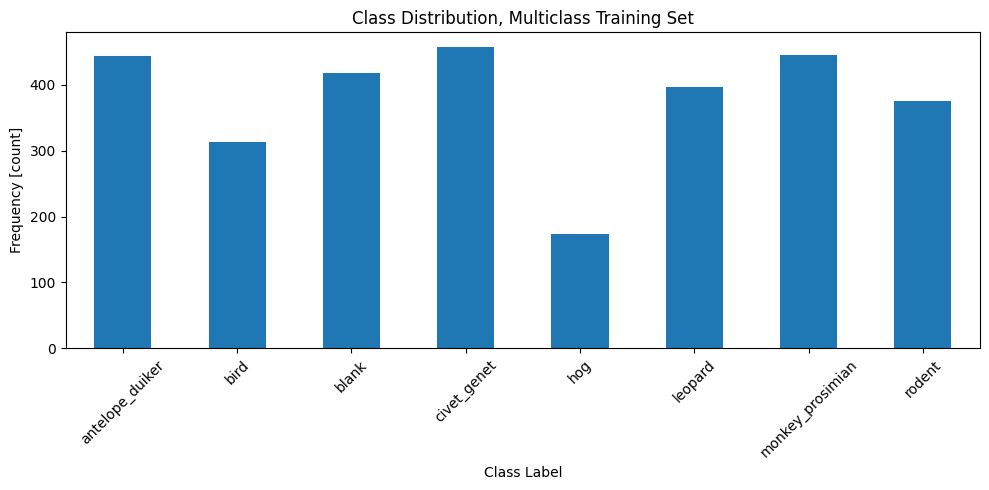

In [21]:
# Create a bar plot of class distributions
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
class_distributions.plot(kind='bar') # Write your code here
ax.set_xlabel("Class Label")
ax.set_ylabel("Frequency [count]")
ax.set_title("Class Distribution, Multiclass Training Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Load Images**

In [25]:
# Define path for hog image
hog_image_path = os.path.join(train_dir, "hog", "ZJ000072.jpg")

# Define path for antelope image
antelope_image_path = os.path.join(train_dir, "antelope_duiker", "ZJ001967.jpg")

print("hog_image_path type:", type(hog_image_path))
print(hog_image_path)
print()
print("antelope_image_path type:", type(antelope_image_path))
print(antelope_image_path)

hog_image_path type: <class 'str'>
data_p1/data_multiclass/train\train_features\hog\ZJ000072.jpg

antelope_image_path type: <class 'str'>
data_p1/data_multiclass/train\train_features\antelope_duiker\ZJ001967.jpg


Load Image using the ```Pillow``` Library:

hog_image_pil type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


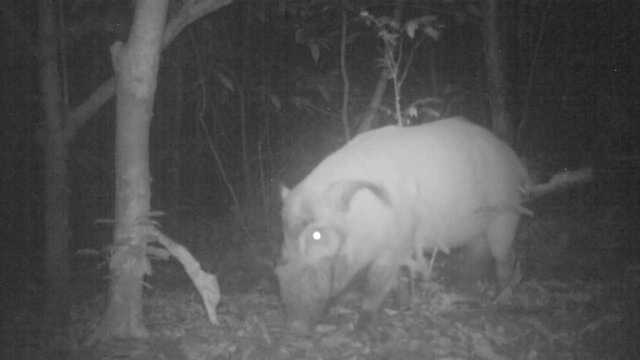

In [26]:
hog_image_pil = Image.open(hog_image_path)

print("hog_image_pil type:", type(hog_image_pil))
hog_image_pil

Next, Antelope. We use PIL to open antelope_image_path:

antelope_image_pil type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


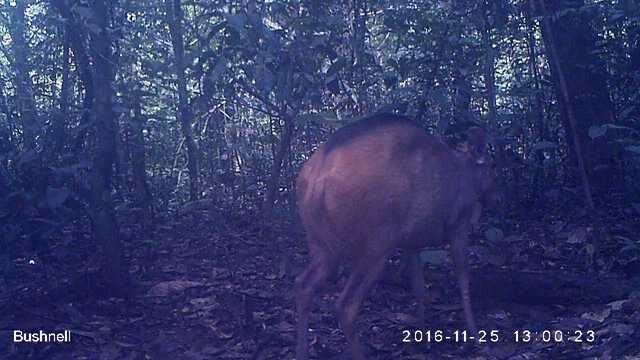

In [27]:
antelope_image_pil = Image.open(antelope_image_path)

print("antelope_image_pil type:", type(antelope_image_pil))
antelope_image_pil

Using PIL to explore size and mode:

In [28]:
# Get image size
hog_image_pil_size = hog_image_pil.size

# Get image mode
hog_image_pil_mode = hog_image_pil.mode

# Print results
print("hog_image_pil_size class:", type(hog_image_pil_size))
print("hog_image_pil_size length:", len(hog_image_pil_size))
print("Hog image size:", hog_image_pil_size)
print()
print("hog_image_pil_mode class:", type(hog_image_pil_mode))
print("Hog image mode:", hog_image_pil_mode)

hog_image_pil_size class: <class 'tuple'>
hog_image_pil_size length: 2
Hog image size: (640, 360)

hog_image_pil_mode class: <class 'str'>
Hog image mode: L


In [29]:
# Get image size
antelope_image_pil_size = antelope_image_pil.size

# Get image mode
antelope_image_pil_mode = antelope_image_pil.mode

# Get image mode
print("antelope_image_pil_size class:", type(antelope_image_pil_size))
print("antelope_image_pil_size length:", len(antelope_image_pil_size))
print("Antelope image size:", antelope_image_pil_size)
print()
print("antelope_image_pil_mode class:", type(antelope_image_pil_mode))
print("Antelope image mode:", antelope_image_pil_mode)

antelope_image_pil_size class: <class 'tuple'>
antelope_image_pil_size length: 2
Antelope image size: (640, 360)

antelope_image_pil_mode class: <class 'str'>
Antelope image mode: RGB


- **Mode**: The hog image is in grayscale (mode="L"), while the antelope image is in color mode (mode="RGB").
- **Size**: The hog images is smaller than the antelope image.

**Load Tensors**

In [ ]:
hog_tensor = transforms.ToTensor()(hog_image_pil)